# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = "C:/Users/USER/Desktop/Driver Drowsiness/archive/"
train_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory( data_dir,
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_generator =  validation_datagen.flow_from_directory( data_dir,
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation')   

Found 38400 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.


# CNN Model

In [23]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [25]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tensorflow.keras.metrics.CategoricalAccuracy()])

In [17]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,537,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,566,818 (21.24 MB)

 Trainable params: 5,566,818 (21.24 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 186s 155ms/step - categorical_accuracy: 0.9205 - loss: 0.2257 - val_categorical_accuracy: 0.9204 - val_loss: 0.1971
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 183s 152ms/step - categorical_accuracy: 0.9555 - loss: 0.1324 - val_categorical_accuracy: 0.9353 - val_loss: 0.1581
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 182s 152ms/step - categorical_accuracy: 0.9700 - loss: 0.0928 - val_categorical_accuracy: 0.9234 - val_loss: 0.2062
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 198s 165ms/step - categorical_accuracy: 0.9806 - loss: 0.0618 - val_categorical_accuracy: 0.9490 - val_loss: 0.1386
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 192s 160ms/step - categorical_accuracy: 0.9775 - loss: 0.0662 - val_categorical_accuracy: 0.9355 - val_loss: 0.1737
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 182s 151ms/step - categorical_accuracy: 0.9824 - loss: 0.0540 - val_categorical_accuracy: 0.9219 - val_loss: 0.2211
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 183s 152ms

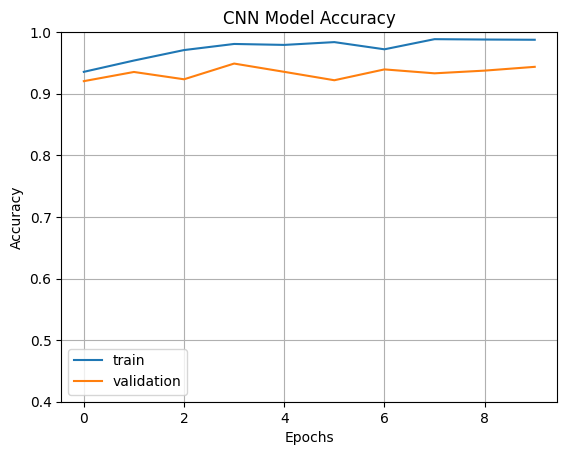

<Figure size 640x480 with 0 Axes>

In [45]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [37]:
cnn_model.save("./cnn.h5")

# Resnet50 Model

In [27]:
resnet50_model = Sequential()

pretrained_model= tensorflow.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model.add(pretrained_model)

In [7]:
resnet50_model.add(Flatten())
resnet50_model.add(Dense(128, activation='relu'))
resnet50_model.add(Dense(2, activation='softmax'))

In [11]:
resnet50_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tensorflow.keras.metrics.CategoricalAccuracy()])

In [18]:
history = resnet50_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 279s 232ms/step - categorical_accuracy: 0.9969 - loss: 0.0093 - val_categorical_accuracy: 0.8639 - val_loss: 0.8680
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 289s 241ms/step - categorical_accuracy: 0.9971 - loss: 0.0088 - val_categorical_accuracy: 0.8628 - val_loss: 0.9209
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 275s 229ms/step - categorical_accuracy: 0.9974 - loss: 0.0075 - val_categorical_accuracy: 0.8459 - val_loss: 1.2621
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 275s 229ms/step - categorical_accuracy: 0.9967 - loss: 0.0106 - val_categorical_accuracy: 0.8691 - val_loss: 1.0743
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 288s 240ms/step - categorical_accuracy: 0.9978 - loss: 0.0063 - val_categorical_accuracy: 0.8407 - val_loss: 1.5676
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 317s 264ms/step - categorical_accuracy: 0.9985 - loss: 0.0042 - val_categorical_accuracy: 0.8826 - val_loss: 1.0032
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 268s 223ms

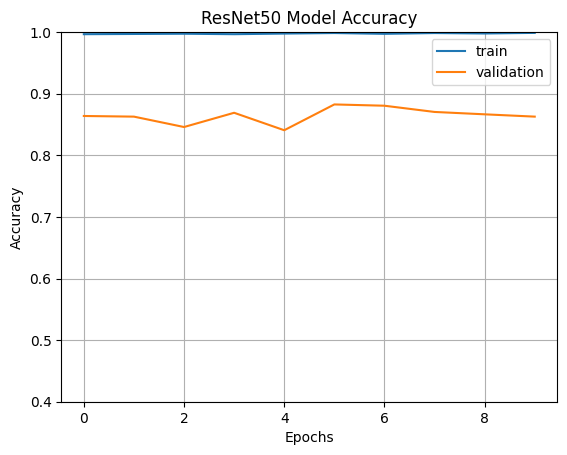

In [44]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('ResNet50 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [87]:
resnet50_model.save("./resnet50.h5")

# Resnet50 Model with Regularization

In [5]:
resnet50_model_regularized = Sequential()

pretrained_model= tensorflow.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model_regularized.add(pretrained_model)

In [7]:
resnet50_model_regularized.add(Flatten())
resnet50_model_regularized.add(Dense(128, activation='relu'))
resnet50_model_regularized.add(Dropout(0.5)) # regularization
resnet50_model_regularized.add(Dense(2, activation='softmax'))

In [9]:
resnet50_model_regularized.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tensorflow.keras.metrics.CategoricalAccuracy()])
history = resnet50_model_regularized.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 328s 262ms/step - categorical_accuracy: 0.9308 - loss: 0.2046 - val_categorical_accuracy: 0.9008 - val_loss: 0.3012
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 334s 278ms/step - categorical_accuracy: 0.9705 - loss: 0.0805 - val_categorical_accuracy: 0.8884 - val_loss: 0.2945
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 296s 247ms/step - categorical_accuracy: 0.9794 - loss: 0.0579 - val_categorical_accuracy: 0.8816 - val_loss: 0.3588
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 270s 225ms/step - categorical_accuracy: 0.9803 - loss: 0.0538 - val_categorical_accuracy: 0.8761 - val_loss: 0.3821
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 273s 227ms/step - categorical_accuracy: 0.9837 - loss: 0.0442 - val_categorical_accuracy: 0.8978 - val_loss: 0.3820
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 256s 214ms/step - categorical_accuracy: 0.9871 - loss: 0.0414 - val_categorical_accuracy: 0.8970 - val_loss: 0.4092
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 258s 215ms

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('ResNet Model (with Regularization) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [13]:
resnet50_model_regularized.save("./resnet50_model_regularized.h5")

<a href="./resnet50_model_regularized.h5"> Download ResNet50 Regularized File </a>

# Resnet50 with Fine Tuning

In [5]:
resnet50_fine_tune1 = Sequential()

pretrained_model= tensorflow.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=True

resnet50_fine_tune1.add(pretrained_model)

In [7]:
resnet50_fine_tune1.add(Flatten())
resnet50_fine_tune1.add(Dense(128, activation='relu'))
resnet50_fine_tune1.add(Dropout(0.5))
resnet50_fine_tune1.add(Dense(2, activation='softmax'))

In [9]:
resnet50_fine_tune1.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tensorflow.keras.metrics.CategoricalAccuracy()])
history = resnet50_fine_tune1.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1384s 1s/step - categorical_accuracy: 0.9474 - loss: 0.1774 - val_categorical_accuracy: 0.7778 - val_loss: 0.7854
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1273s 1s/step - categorical_accuracy: 0.9818 - loss: 0.0548 - val_categorical_accuracy: 0.9119 - val_loss: 0.2344
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1247s 1s/step - categorical_accuracy: 0.9825 - loss: 0.0551 - val_categorical_accuracy: 0.8959 - val_loss: 0.3152
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1264s 1s/step - categorical_accuracy: 0.8772 - loss: 0.6467 - val_categorical_accuracy: 0.9170 - val_loss: 0.2492
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1259s 1s/step - categorical_accuracy: 0.9633 - loss: 0.1110 - val_categorical_accuracy: 0.7416 - val_loss: 5.6072
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1258s 1s/step - categorical_accuracy: 0.9638 - loss: 0.0875 - val_categorical_accuracy: 0.9170 - val_loss: 0.3266
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1279s 1s/step - catego

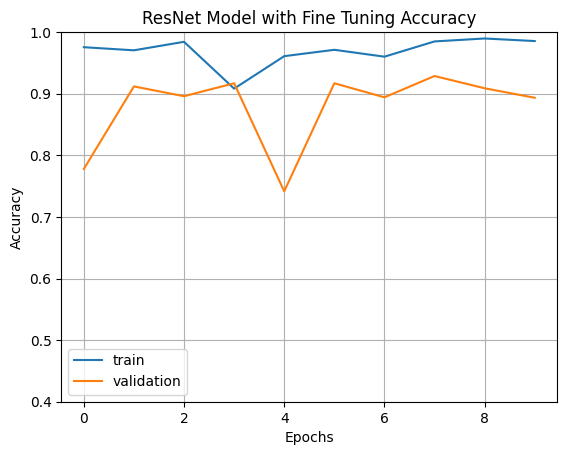

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('ResNet Model with Fine Tuning Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [15]:
resnet50_fine_tune1.save("./resnet50_fine_tune1.h5")

<a href="./resnet50.h5"> Download ResNet50 File </a>

<a href="./resnet50_fine_tune.h5"> Download fine_tune ResNet50 File </a>

# Prediction with the CNN Model

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from keras.models import load_model
test_model = load_model('./cnn.h5')

In [91]:
img_width, img_height = 32,32

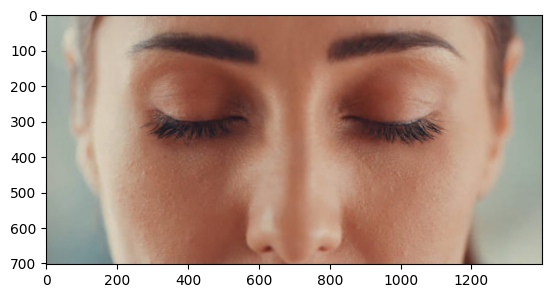

In [96]:
image=cv2.imread("C:/Users/USER/Desktop/Driver Drowsiness/Test_closed.jpeg")
# Convert from BGR to RGB
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [98]:
image_resized= cv2.resize(image, (img_width, img_height))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 32, 32, 3)


In [100]:
pred=test_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [69]:
output_class=np.argmax(pred)
print("Predicted Class = ", output_class)
if output_class == 0:   # 0 ==> Eyes are closed ; 1 ==> Eyes are open 
    print("Predicted Status: Closed Eyes")
else:
    print("Predicted Status: Open Eyes")

Predicted Class =  0
Predicted Status: Closed Eyes


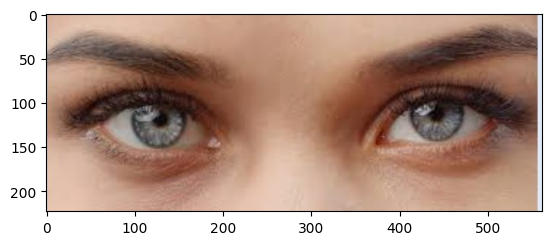

In [81]:
image=cv2.imread("C:/Users/USER/Desktop/Driver Drowsiness/Test_open.jpeg")
# Convert from BGR to RGB
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [83]:
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 32, 32, 3)


In [85]:
pred=test_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [87]:
output_class=np.argmax(pred)
print("Predicted Class = ", output_class)
if output_class == 0:   # 0 ==> Eyes are closed ; 1 ==> Eyes are open 
    print("Predicted Status: Closed Eyes")
else:
    print("Predicted Status: Open Eyes")

Predicted Class =  1
Predicted Status: Open Eyes
